<a href="https://colab.research.google.com/github/JABINOGANGA/Hypothyriod-condition-Analysis-/blob/main/Jabin_Oganga_WK8_HYPOTHROID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. As a Data Scientist, build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid based on the healthcare datasets provided

## b) Defining the Metric for Success

1) The model will considered a success if it can succefully predit whether or not the patient's symptoms indicate that the patient has hypothyroid.

2) The model achieves atleast 80% accuracy

3) Have the lowest RMSE score possible



## c) Understanding the context

The fact that you are of a specific gender

Age (60 years)


Genetic history

Thyroidectomy

Pregnancy

## d) Recording the Experimental Design

### 1. Decision Trees
We will use the following trees to classify a whether a patient has hypothyroididm or tests negatively:

  Random Forest Classifier

  AdaBoost Classifier

  Gradient Boost Classifier

### 2. SVM Models
We will use the following SVM models to to place a patient in the right category with regards to predicting their hypothyroidism status:

> Polynomial

> Linear

> Rbf


## e) Data Relevance

The data provided is enough and relevant to build a relatively correct model to predict whether or not the patient's symptoms indicate that the patient has hypothyroid.

# 2. Importing relevant libraries

In [51]:
#Importing the relevant libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn_pandas import DataFrameMapper, CategoricalImputer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from IPython.display import Image  

import pydotplus

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Previewing the head of the dataset

thyro = pd.read_csv('/content/hypothyroid.csv')
thyro.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# Previewing the tail of the dataset

thyro.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# Checking the data's information

thyro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [5]:
thyro.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [6]:
# Checking the column's data types

thyro.dtypes

# All columns have the data type of objects

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# Checking the unique values in each column using a for loop


for column in thyro.columns:
  print(column)
  print(thyro[column].unique())
  print(thyro[column].nunique())
  print('\n')

status
['hypothyroid' 'negative']
2


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93


sex
['M' 'F' '?']
3


on_thyroxine
['f' 't']
2


query_on_thyroxine
['f' 't']
2


on_antithyroid_medication
['f' 't']
2


thyroid_surgery
['f' 't']
2


query_hypothyroid
['f' 't']
2


query_hyperthyroid
['f' 't']
2


pregnant
['f' 't']
2


sick
['f' 't']
2


tumor
['f' 't']
2


lithium
['f' 't']
2


goitre
['f' 't']
2


TSH_measured
['y' 'n']
2


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '5

### 3. Tidying up our DataSet

In [8]:
# Replacing '?' with zeros

thyro = thyro.replace(['?'], np.nan)
thyro.isnull().sum().sum()


5329

In [9]:
# changing the column datatypes by creating arrays of numerical columns
# and categorical columns

# Creating a copy
thyro = thyro

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in thyro.columns:
  if column in numerical_columns:
    thyro[column]= pd.to_numeric(thyro[column])
  
  else:
    thyro[column] = thyro[column].astype('category')
    
    
# Confirming changes

thyro.dtypes

# The data types have now been set correctly

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

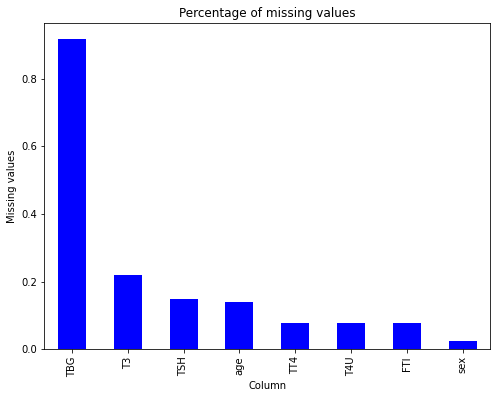

In [10]:
thyro.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'blue')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [11]:
thyro['age']= thyro['age'].fillna(thyro['age'].mode(), axis = 0)
thyro['sex']= thyro['sex'].fillna(thyro['sex'].mode(), axis = 0)


In [12]:
#dropping the null values and assigning the resultant values to a new dataframe
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

thyro[numerical_columns_2] = thyro[numerical_columns_2].fillna(0)

In [13]:
# Number of duplicated rows

thyro.duplicated().sum()

77

In [14]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
thyro= thyro.drop(['TBG'], axis =1)

In [15]:
# Dropping of duplicated entries since they cause noise in the model

thyro = thyro.drop_duplicates()

# Confirming the dropping of duplicates

thyro.duplicated().sum()

0

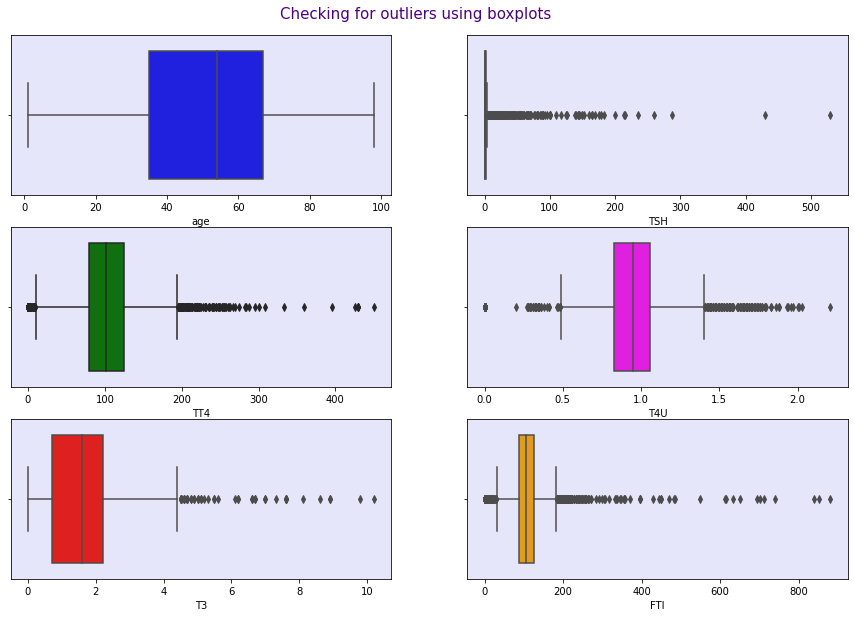

In [16]:
# Using a boxplot to check for outliers

# Creating a list of columns to check for outliers
# Creating a list of colors

import seaborn as sns

cols = ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']
colors = ['blue', 'yellow', 'green', 'fuchsia', 'red', 'orange']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), thyro, cols, colors):
  sns.boxplot(thyro[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  
# Setting the background color to lavender
# The boxplots above indicate the extent of outliers in each of the above columns

## 4. Exploratory Analysis


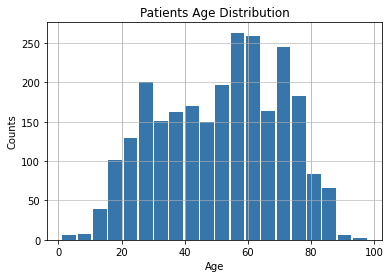

In [17]:
# Visualizing the age distribution

#visualizing age dirstibution
size, scale = 1000, 10
age = thyro['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#### The Majority of the patients are people aged between 50 to 90 years which are categorized as the elderly, this implies that the condition affects people mostly at their old age.

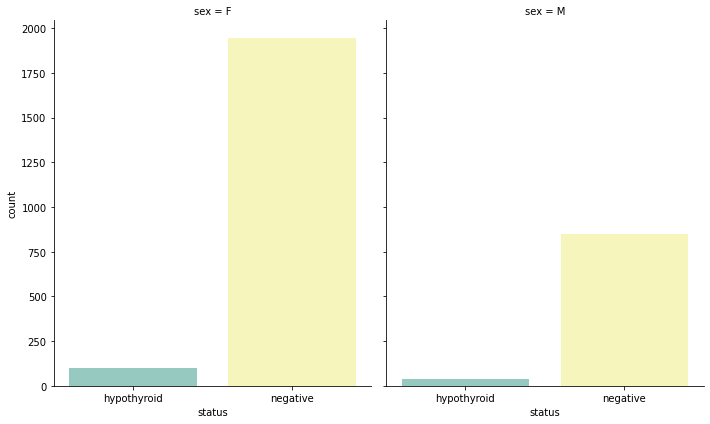

In [18]:
# Plotting bar charts

sns.catplot("status", col="sex", col_wrap=4, data=thyro, kind="count", height=6, aspect=.8, palette='Set3')
plt.show()

# Bar graph showing the distribution of hypothyroidism among the different genders


#### More females are prone to contracting the disease as compared to the males

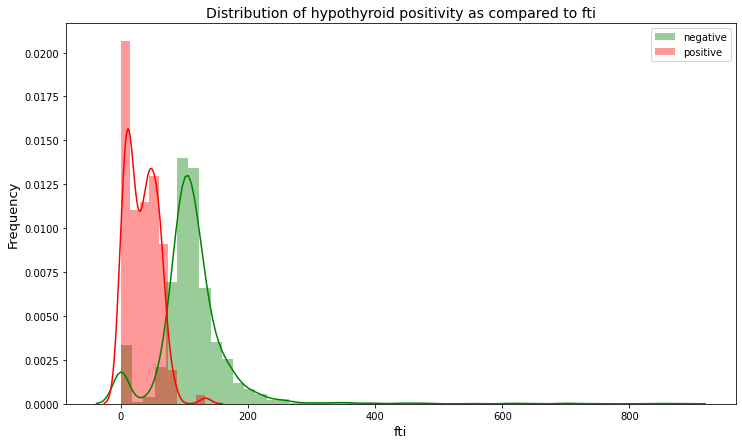

In [19]:
# Plotting histogram to show distribution of hypothyroid positivity as compared to fti
# 
negative = thyro.loc[thyro.status=='negative', 'FTI']    # Selecting only negative datapoints in the age column
positive = thyro.loc[thyro.status=='hypothyroid', 'FTI']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of hypothyroid positivity as compared to fti', fontsize = 14, color = 'k')
plt.xlabel('fti', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

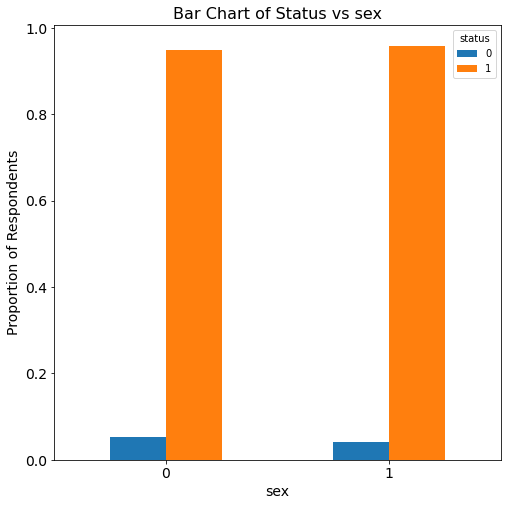

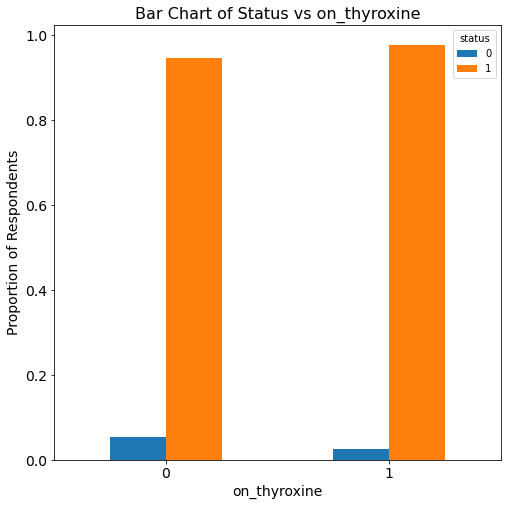

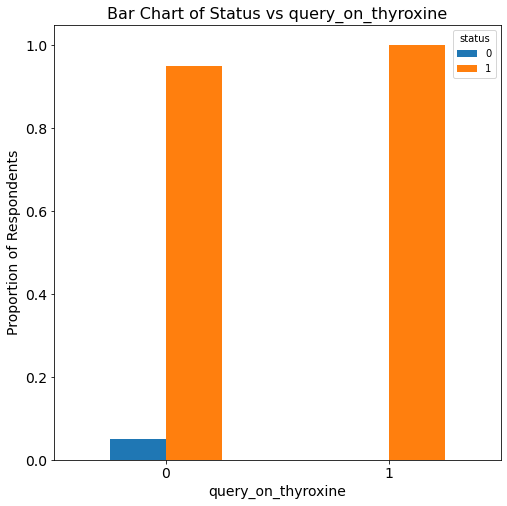

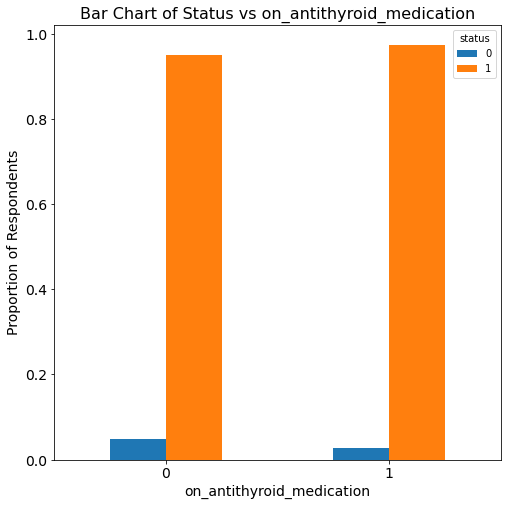

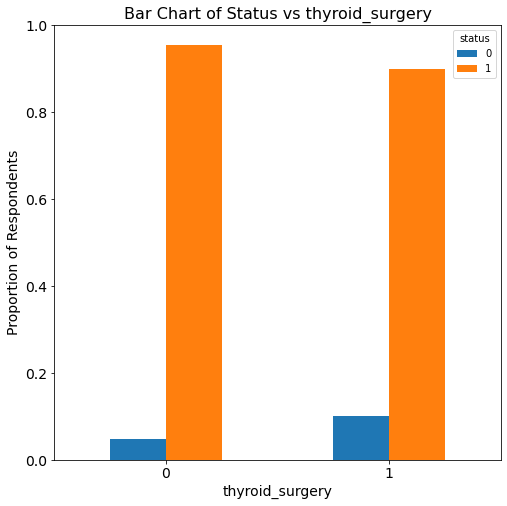

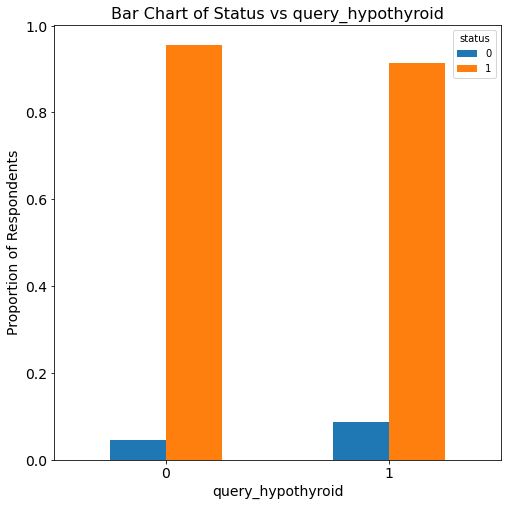

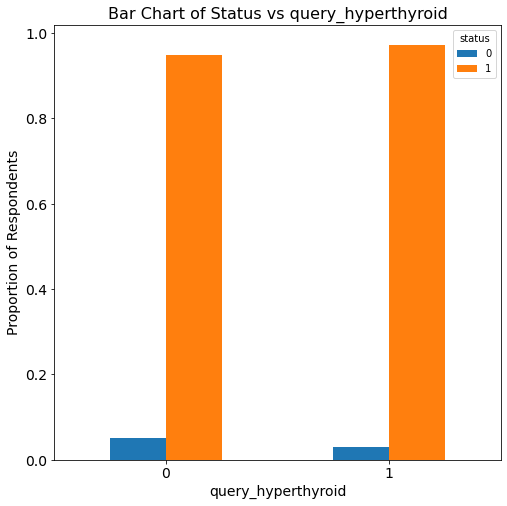

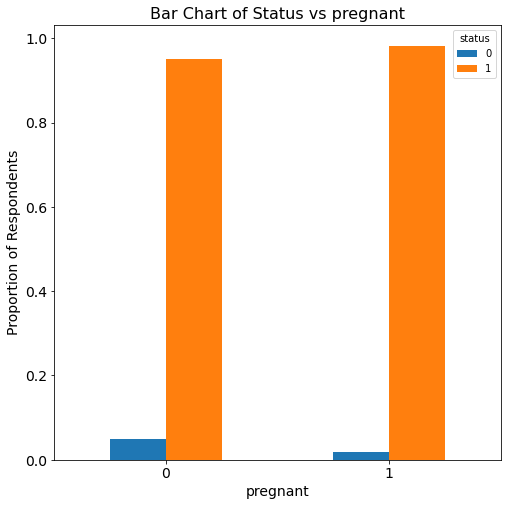

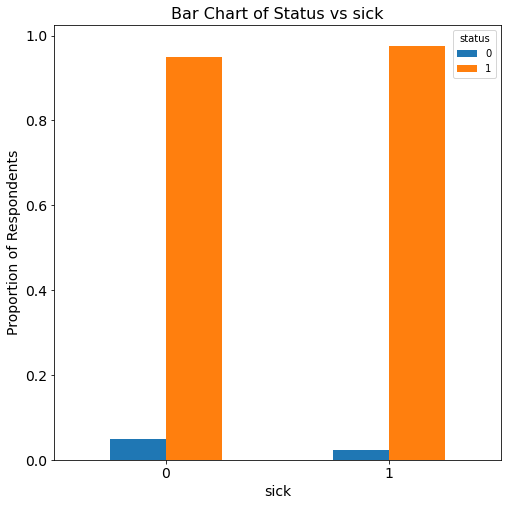

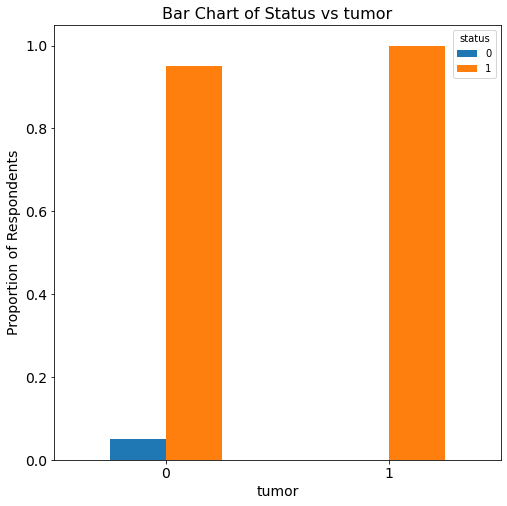

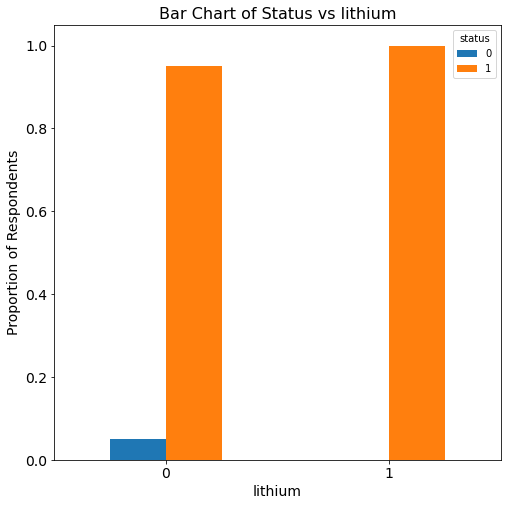

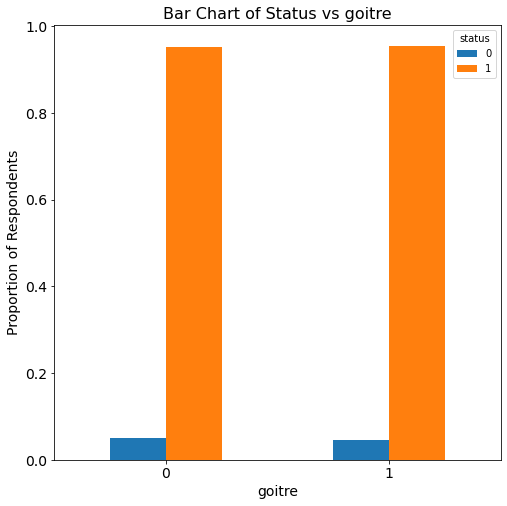

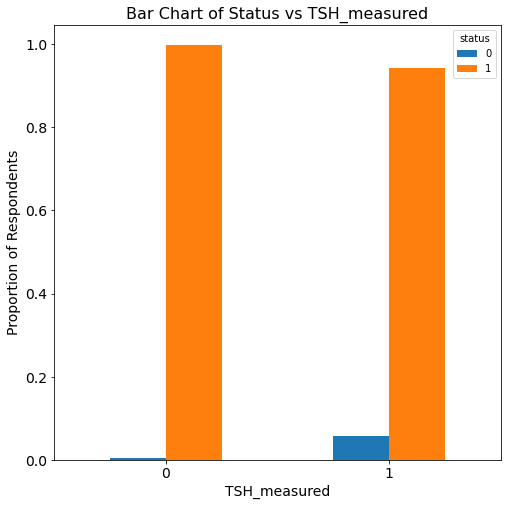

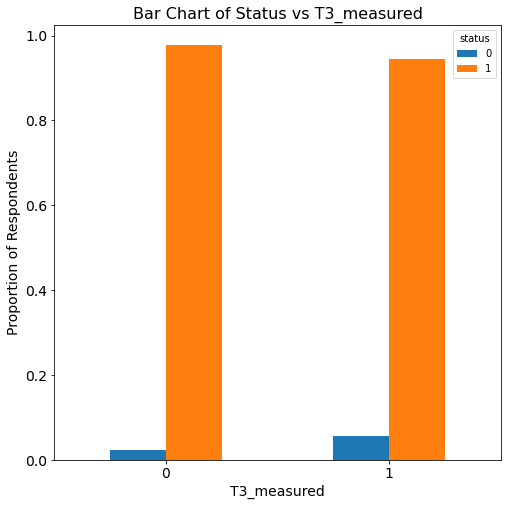

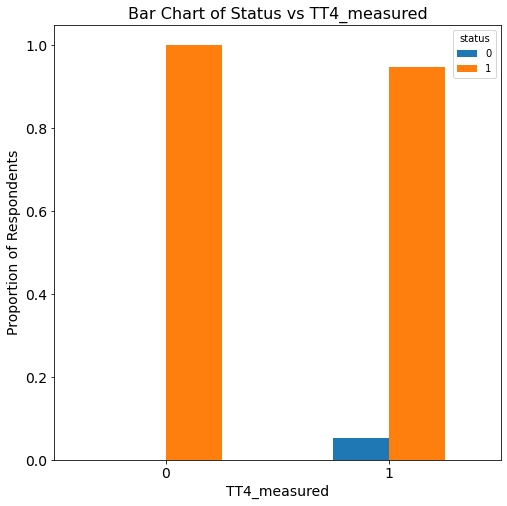

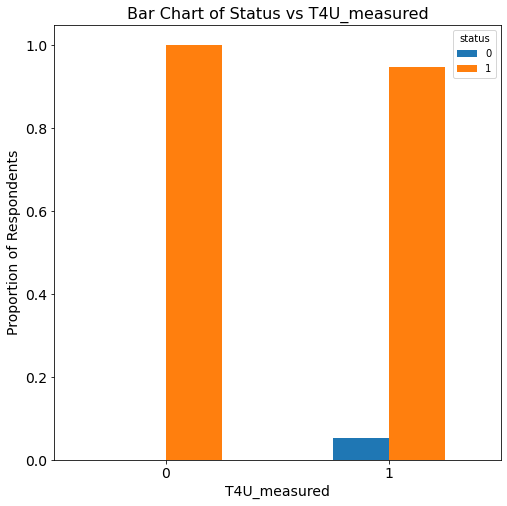

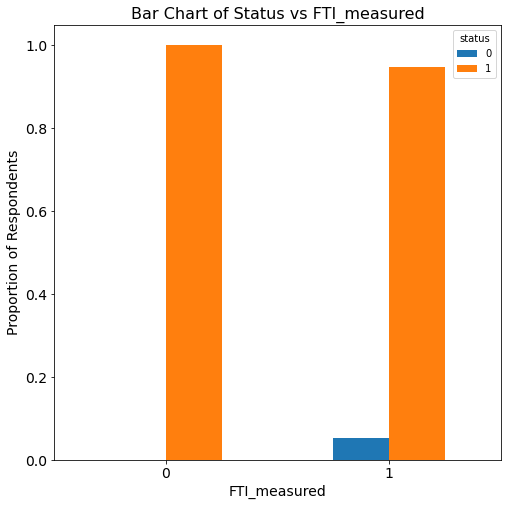

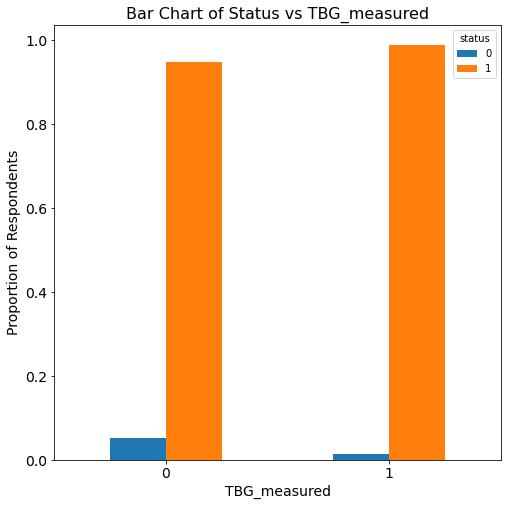

In [76]:
# Bar charts to compare the whether a person has hypothyroid vs the different categorical variables 
cols =['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

for i in cols:
  table=pd.crosstab(thyro[i],thyro['status'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (8,8), stacked=False)
  plt.title('Bar Chart of Status vs {}'.format(i), fontsize = 16)
  plt.xlabel(i, fontsize = 14)
  plt.ylabel('Proportion of Respondents', fontsize = 14)
  plt.xticks(rotation = 360, fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()


The Summary:

- The proportion of males that have hypothyroidism is not different from the number of females that have hypothyroidism.
- Those who are not on thyroxine have a higher proportion of respondents with hypothyroidism. Those who query have no respondent recording hypothyroidism.
- Of those who had their FTI, T4U, TT4, and TSH measured less than 0.1% of the respondents have hypothyroidism. Of those who haven't, none of them have hypothyroidism.


- A higher proportion of respondents not on antithyroid medication have hypothyroidism than those who aren't.
- A higher proportion of those who have undergone thyroid surgery have hypothyroidism than those who have not undergone surgery.


- Those who are not pregnant have a higher proportion of respondents with hypothyroid than those who are pregnant.

In [20]:
# Displaying the correlations between the variables

corr = thyro.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.009555,-0.098816,-0.026410,-0.067604,0.082491
TSH,0.009555,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.098816,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.026410,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.067604,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.082491,-0.199480,0.290009,0.738844,0.100747,1.000000


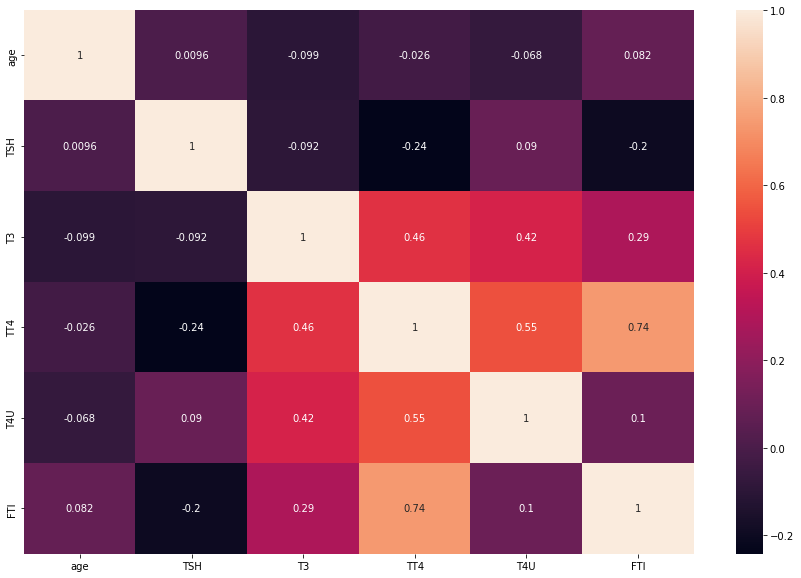

In [21]:
# Checking the extent of correlation using a heatmap

corr = thyro.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()
# The light shaded intersections have high correlation
# while the purple intersections have little or no correlation.

In [22]:
thyro.dropna(inplace = True, axis = 0)

In [28]:
# Selecting your columns for the features used and the target for the modelling
qcol =['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']


In [29]:
# Converting the columns to numerics to work use for the modelling 
for i in qcol:
  thyro[i] = thyro[i].astype('category')
  thyro[i] = thyro[i].cat.codes

# Confirming the changes

print(thyro['status'].unique())
print(' ')
print(thyro.dtypes)

[0 1]
 
status                          int8
age                          float64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                          float64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
TBG_measured                    int8
dtype: object


In [30]:
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

X = thyro[features]
y = thyro['status']

## 7. Testing for multicollinearity


> Decision Trees and boosted tree algorithms like AdaBoost and Gradient Boost are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. Hence, I will make a copy of the dataset but without dropping any features.


>In this case, I will only test for multicollinearity for the sake of the data that will be used in the SVM model. This is because the impact of multicollinearity in the Multiple Linear Regression is similar to that on the SVM linear kernel.


In [31]:
correlations = X.corr()
correlations

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
age,1.000000,0.000984,-0.004176,-0.024180,-0.067236,-0.016713,0.044323,-0.091077,-0.168232,0.068086,-0.069287,-0.022336,-0.041548,0.196911,0.009603,0.172700,-0.099650,0.105806,-0.028851,0.102795,-0.070657,0.103527,0.080195,-0.109861
sex,0.000984,1.000000,-0.142940,0.058558,-0.049400,-0.054775,-0.069654,-0.070438,-0.098919,0.025646,-0.008135,-0.018329,-0.096550,0.004448,-0.039852,0.087465,-0.006003,0.063103,-0.123001,0.062202,-0.117318,0.064974,-0.014384,-0.066578
on_thyroxine,-0.004176,-0.142940,1.000000,-0.035390,-0.025377,0.026674,0.060374,-0.099376,-0.001544,-0.069439,-0.026472,-0.012262,-0.036951,0.056444,-0.012162,-0.187816,-0.107082,0.030810,0.215209,0.030170,0.062055,0.034110,0.193014,-0.035799
query_on_thyroxine,-0.024180,0.058558,-0.035390,1.000000,-0.016110,0.022555,-0.018436,-0.040111,-0.020356,-0.024998,0.057577,-0.003772,0.006503,-0.135225,-0.027256,-0.092936,-0.070808,0.033292,0.000621,0.033172,-0.003640,0.033051,0.024229,-0.034243
on_antithyroid_medication,-0.067236,-0.049400,-0.025377,-0.016110,1.000000,-0.004494,-0.035321,0.098131,0.004511,-0.022071,-0.014423,-0.003330,-0.022602,-0.020512,-0.001510,-0.009672,0.044421,-0.056155,-0.029542,-0.056536,-0.019486,-0.056920,-0.048051,0.053217
thyroid_surgery,-0.016713,-0.054775,0.026674,0.022555,-0.004494,1.000000,0.006437,0.029563,-0.014108,-0.035071,-0.022918,-0.005292,-0.024277,0.037729,0.014169,0.006601,0.002909,0.000885,-0.019382,0.000569,0.014693,0.000252,-0.025367,-0.003343
query_hypothyroid,0.044323,-0.069654,0.060374,-0.018436,-0.035321,0.006437,1.000000,-0.019782,-0.015501,-0.054807,-0.035815,0.043007,-0.024845,0.046234,0.069247,-0.031832,-0.045103,0.023731,0.008548,0.023309,0.037591,0.022885,-0.017259,-0.027024
query_hyperthyroid,-0.091077,-0.070438,-0.099376,-0.040111,0.098131,0.029563,-0.019782,1.000000,0.071514,-0.054951,-0.035909,-0.008292,0.037366,-0.124282,-0.037280,-0.013683,0.126010,-0.086564,0.082110,-0.087342,-0.025572,-0.088125,0.065928,0.098536
pregnant,-0.168232,-0.098919,-0.001544,-0.020356,0.004511,-0.014108,-0.015501,0.071514,1.000000,-0.027887,0.003958,-0.004208,0.087051,0.005617,-0.013386,0.034311,0.184603,-0.008373,0.159750,-0.008654,0.240538,-0.008936,-0.008012,0.006196
sick,0.068086,0.025646,-0.069439,-0.024998,-0.022071,-0.035071,-0.054807,-0.054951,-0.027887,1.000000,-0.022379,-0.005167,-0.035071,0.041486,-0.003434,0.076165,-0.027544,0.017499,-0.030811,0.017244,-0.026993,0.016988,-0.008880,-0.019491


### Single Decision Tree

In [34]:
# Specifying X and y for the decision tree and ensemble methods

X_tree = thyro[features]
y_tree = thyro['status']

# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size= 0.25, random_state =99)

# Fitting the model
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# The prediction accuracy in this case is a bit too high which could indicate overfitting as it is 100%.
# To try and fix this we can try tune the parameters

Prediction accuracy: 1.0
Test accuracy: 0.9890965732087228


In [77]:
# Hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [78]:
# Checking for the best parameters and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9792206390328151


In [37]:
# Fitting the model with the new parameters
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3)

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Using 1 decision tree, the test accuracy is 98.6%

Prediction accuracy: 0.9922077922077922
Test accuracy: 0.9922118380062306


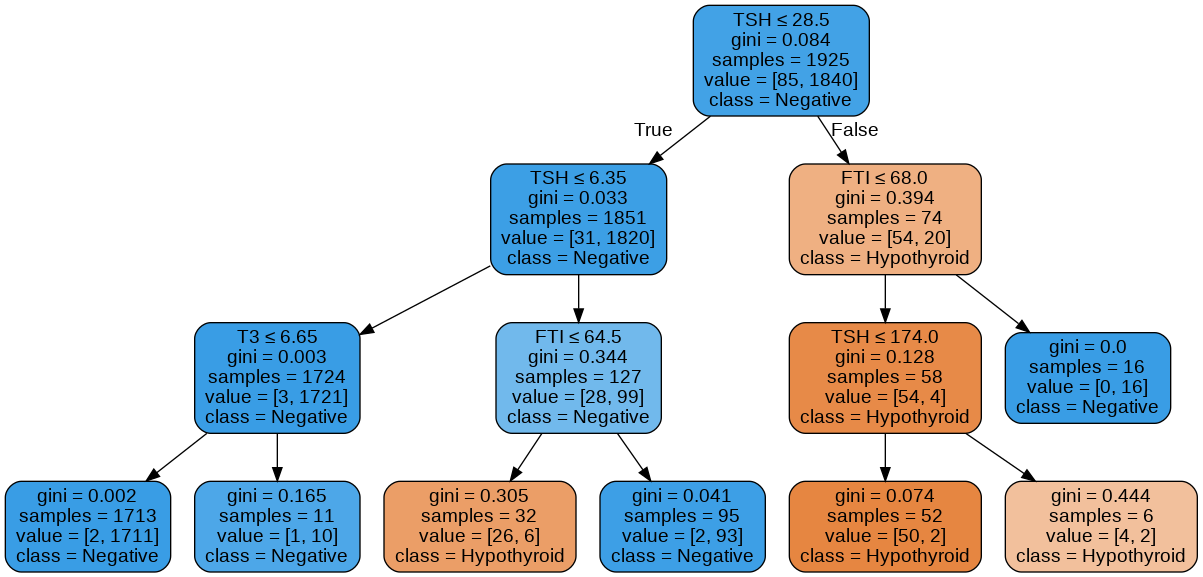

In [38]:
# Visualizing the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# From this tree, we can see that FTI was considered the most important
# feature of all of them as it was put as the root node.


#### Among all the features, only FTI, TSH, age, query_hypothyroid and T3 were considered.

### Ada Boost Modelling

In [79]:
# Checking if Adaboost does any better

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5), 
                          n_estimators=300, random_state=20)

ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the target number of trees being 300, adaboost's test
# accuracy dropped from 99.7 in decision trees to 1.0
# Attempting some hyperparameter tuning

Prediction accuracy: 0.9974025974025974
Test accuracy: 0.9579439252336449


In [40]:
# Hyperparameter tuning using grid search

param_grid = {'n_estimators': np.arange(100,300,50)}

search = GridSearchCV(estimator = ada_boost, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [41]:
# Checking for the best parameter and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

# The best parameter in this case is n_estimators = 150

{'n_estimators': 150}
0.9880519480519482


In [83]:
# Running adaboost with the target number of trees as 150

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5), 
                          n_estimators = 150, random_state=20)

ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9974025974025974
Test accuracy: 0.9579439252336449


In [43]:
# Building the model with gradient boosting

gbr = GradientBoostingClassifier()
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without hyperparameter tuning, the gradient boosting gave an accuracy score of 99.9%
# which is higher than Adaboost

Prediction accuracy: 0.9994805194805195
Test accuracy: 0.9922118380062306


Without hyperparameter tuning, the gradient boosting gave an accuracy score of 99.9%
which is higher than Adaboost which was 99.7% but seems like overfitting

In [44]:
# Hyper parameter tuning
# Learning rate, max_depth and n_setimators are the most
# important parameters in Gradient Boosting. 
# Therefore those are the ones I will use.

param_grid = {'learning_rate': np.arange(0.1,1,0.1),
              'max_depth': [1,2,3,4,5],
              'n_estimators': np.arange(100,300,100)}

search = GridSearchCV(estimator = gbr, param_grid = param_grid, scoring = 'accuracy')

In [45]:
# Checking for the best parameter and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.9911688311688313


In [46]:
# Putting the new parameters in

gbr = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9968831168831169
Test accuracy: 0.9922118380062306


With 150 being the target number of trees, the ada boost model accuracy is 99.7%.which is 1% Higher than that of the individual decision tree which was at 98.6%

Gradient Boosting

Gradient boosting builds trees one at a time, where each new tree helps to correct errors made by the previous tree. Instead of a tree stump, gradient boost starts by making a single leaf.

### Random Forest 
Involves creating multiple random decision trees and combine their overal performance to make predictions


In [47]:
# Building a model using Random Forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(random_state=99)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without tuning of parameters, Random Forest gives an accuracy of 98.4

Prediction accuracy: 1.0
Test accuracy: 0.9844236760124611


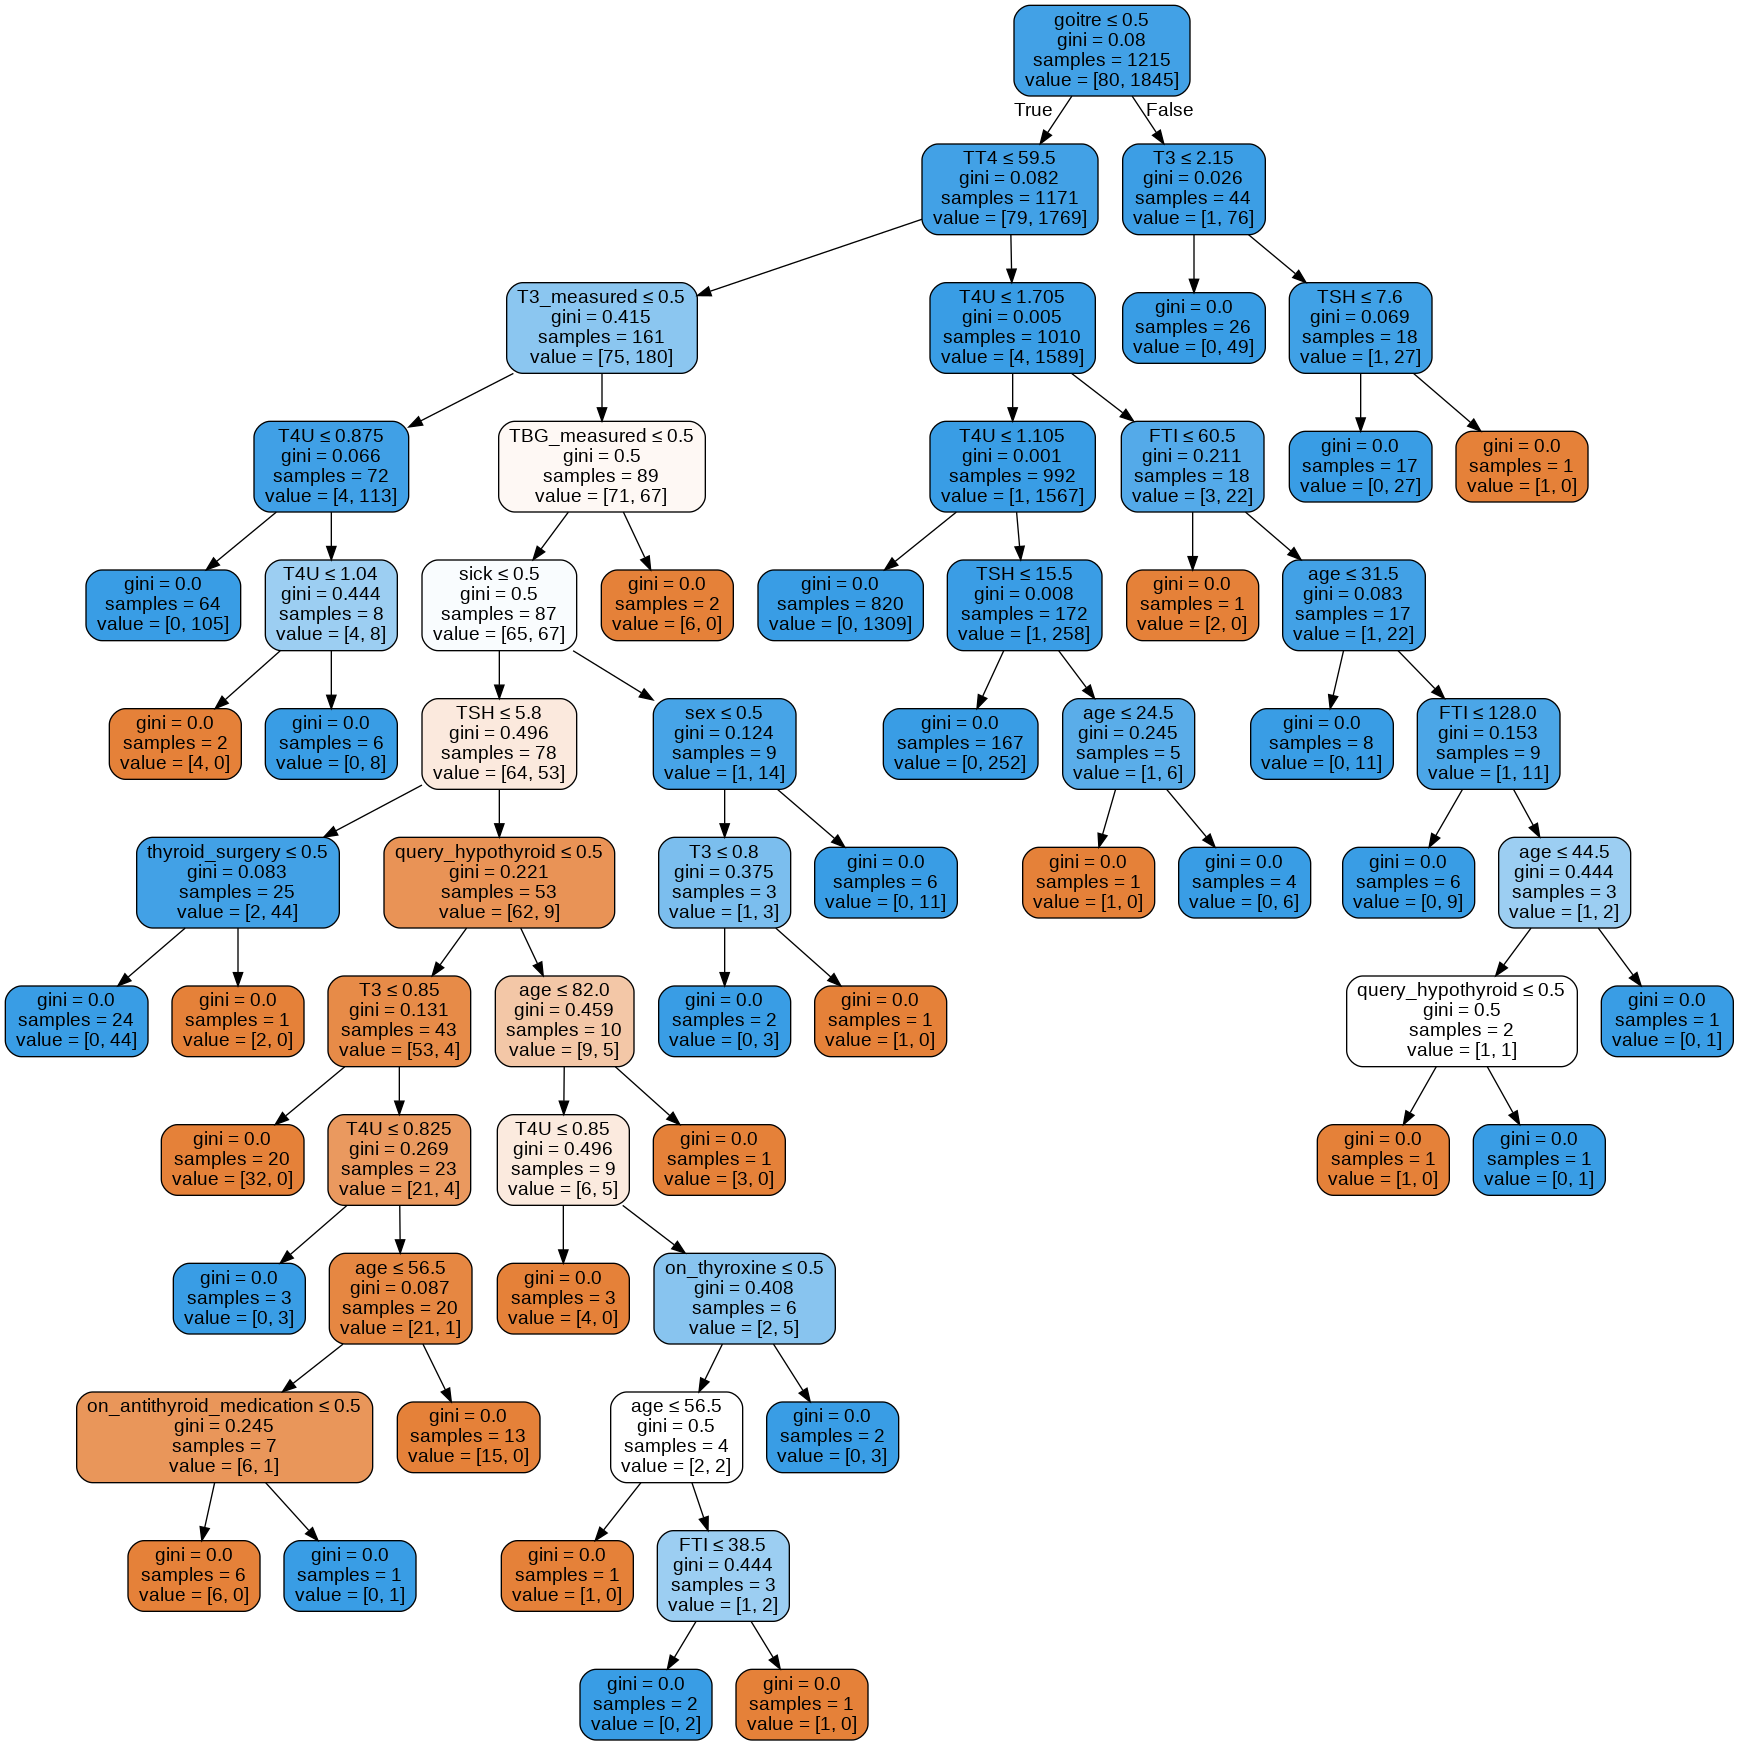

In [48]:
# Plotting the 15 random tree

dot_data = StringIO()
# pick a specific tree from the forest
tree = rf.estimators_[15]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

It gives an accuracy of 100% which is overfitting and that makes our model only fit for this specific dataset

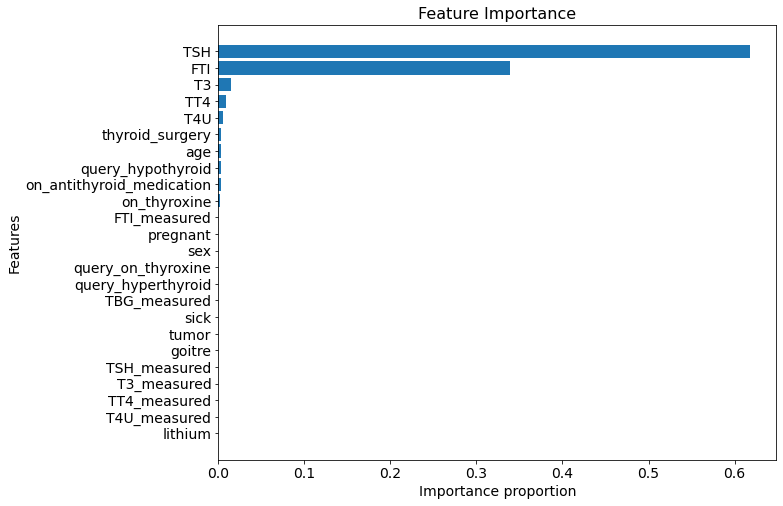

In [49]:
# Obtaining the most important features in the gradient boost model.

# To show feature importance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title('Feature Importance', fontsize=16)
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.xlabel('Importance proportion', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


**Feature selection **

The feature with the lowest Gini score is used as the root of the tree. The Gini coefficient tells us how impure a node is, that is how mixed up one category is with another.

In this case the most important feature is FTI in the gradient boosting model. This is shown also in the single decision tree created. This means that it has the lowest Gini score. FTI would help us identify one class over the other better than any other feature

### Support Vector Machine (SVM)

In [52]:
# Splitting X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 66)

# Standardizing our X_train and X_test. Standardizing
# of features is extremely important in SVM. Variables with
# bigger magnitudes will be considered more important than those with smaller magnitudes which may lead to a wrong prediction.
# Bringing the values within the same range makes the model predictions more accurate.

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


#### Linear Kernel

In [53]:
# Building the linear model

linear = SVC(kernel= 'linear')

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the linear model without any hyperparameter tuning
# test accuracy is 97.7

Prediction accuracy: 0.9880519480519481
Test accuracy: 0.9719626168224299


In [54]:
# Hyperparameter tuning

param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(1,10, 1),
              'kernel' : ['linear']}

search = GridSearchCV(estimator = linear, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [55]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

{'C': 2, 'gamma': 1, 'kernel': 'linear'}
0.9844155844155843


In [56]:
# Building the linear model

linear = SVC(kernel= 'linear', C = 1 , gamma=1)

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Still giving the same accuracy score as before


Prediction accuracy: 0.9880519480519481
Test accuracy: 0.9719626168224299


In [57]:
# Experimenting with other hyperparameters

linear = SVC(kernel= 'linear', C = 5 , gamma=5)

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With a C and gamma equal to 5, The accuracy score rises to 97.8

Prediction accuracy: 0.9880519480519481
Test accuracy: 0.9766355140186916


#### Rbf Kernel Modelling


In [58]:
# Building the rbf model

rbf = SVC(kernel= 'rbf')

# Fitting the model

rbf.fit(X_train_std, y_train)

# Making predictions

y_pred = rbf.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the rbf kernel, the accuracy came at 97.5%

Prediction accuracy: 0.9854545454545455
Test accuracy: 0.9735202492211839


In [59]:
# Hyperparameter tuning

param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(0,1,0.1),
              'kernel' : ['rbf']}

search = GridSearchCV(estimator = rbf, param_grid = param_grid, scoring = 'accuracy')

In [60]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

# The parameters used for this are C = 8 and gamma = 0.1
# Let us build a model with the new parameters and see

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.9781818181818182


In [61]:
# Building the rbf model using the recommended parameters

rbf = SVC(kernel= 'rbf', C = 8 , gamma=0.1)

# Fitting the model

rbf.fit(X_train_std, y_train)

# Making predictions

y_pred = rbf.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# After tuning the parameters, the accuracy has risen from 97.4%
# to 97.7%

Prediction accuracy: 0.9958441558441559
Test accuracy: 0.9750778816199377


#### Polynomial Kernel

In [62]:
# Building the polynomial model

poly = SVC(kernel= 'poly')

# Fitting the model

poly.fit(X_train_std, y_train)

# Making predictions

y_pred = poly.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, poly.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without hyperparameter tuning, the polynomial model gives
# An accuracy of 96.8%

Prediction accuracy: 0.9776623376623377
Test accuracy: 0.9641744548286605


In [63]:
# Hyper parameter tuning

param_grid = {'degree': np.arange(1,5,1), 
              'gamma': [1,0.1,0.01,0.001],
              'C': np.arange(1,10,1),
              'kernel' : ['poly']}

search = GridSearchCV(estimator = poly, param_grid = param_grid, scoring = 'accuracy')

In [64]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

{'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.9844155844155843


In [65]:
# Building the polynomial model with the recommended parameters

poly = SVC(kernel= 'poly', C = 1 , gamma=1, degree=1)

# Fitting the model

poly.fit(X_train_std, y_train)

# Making predictions

y_pred = poly.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, poly.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the degree as 1(linear), c=1 and gamma =1
# We get an accuracy of 97.73 just like the other 3 kernels

Prediction accuracy: 0.9880519480519481
Test accuracy: 0.9719626168224299


The SVM model with the most ideal accuracy is the one built using the linear kernel with C = 5 and gamma = 5. The model accuracy obtained was 97.8%

In [66]:
# Obtaining the features names used in SVM

feature_names = X.columns
feature_names

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

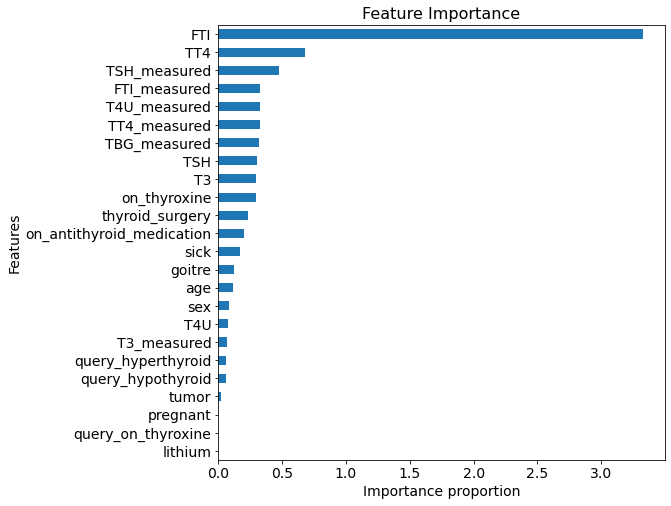

In [67]:
# Checking on the most important in the linear kernel model

plt.figure(figsize=(8,8))
pd.Series(abs(linear.coef_[0]), index=feature_names).sort_values().plot(kind='barh')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance proportion', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [68]:
# Preprocessing

X_ln = thyro[['FTI', 'TT4', 'TSH_measured', 'TSH', 'on_thyroxine', 'T4U', 'on_antithyroid_medication', 'T3', 'T3_measured', 'age',
           'sex', 'thyroid_surgery']]

# Splitting X and y into train and test

X_train, X_test, y_train, y_test = train_test_split(X_ln, y, test_size = 0.25, random_state = 66)

# Standardizing our X_train and X_test

sc = StandardScaler()
X_train_stdln = sc.fit_transform(X_train)
X_test_stdln = sc.transform(X_test)


In [69]:
# Building the linear kernel model with most of the features

linear = SVC(kernel= 'linear', C = 5 , gamma=5)

# Fitting the model

linear.fit(X_train_stdln, y_train)

# Making predictions

y_pred = linear.predict(X_test_stdln)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_stdln)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# The accuracy score is at 97.7

Prediction accuracy: 0.9864935064935065
Test accuracy: 0.9735202492211839


In [70]:
# Using only two features with the linear kernel to see if they will give a higher accuracy
X_2 = thyro[['FTI', 'TT4']]

In [71]:
# Splitting again

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 66)

# Standardizing

X_train_std2 = sc.fit_transform(X_train)
X_test_std2 = sc.transform(X_test)

# Fitting the model
linear.fit(X_train_std2, y_train)

# Making predictions

y_pred = linear.predict(X_test_std2)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std2)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the 2 features only, the model did not do any better than before.
# The test accuracy dropped from 97.7% to 96.9%

Prediction accuracy: 0.9548051948051948
Test accuracy: 0.9392523364485982


## 9. Challenging the solution

- For comparison purposes, I would also attempt to build a model using Naive Bayes and K-Nearest Neighbours. This would give a better picture of which algorithm performs best for this problem.

- For hyperparameter tuning, I would attempt to use Bayesian Optimization technique. Using Grid search has proven computationally expensive especially in the case of building models using SVM.

## 10. Conclusion

Some of the conclusions that can be made from this project:

- Tree based algorithms have performed better overall than the SVM algorithms. The models built using the tree based algorithms all gave accuracies of 98% and above. With SVM, none of the models attained a 99.7% accuracy.
- Among the ensemble tree based algorithms, Gradient boosting had the highest accuracy at 100%.
- Among the SVM algorithms, the model built using the SVM linear kernel algorithm performed the best with an accuracy of 97.7%
- In both the ensemble methods models and the SVM models, FTI was the most important feature in predicting whether an individual has hypothyroidism or not.

- The best algorithm to use would be SVM as it is not overfitting or underfitting